<a href="https://colab.research.google.com/github/majagurdek/Game-Theory/blob/main/PettingZoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pettingzoo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 816.1/816.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 44.6 MB/s eta 0:00:00


Streaming output truncated to the last 5000 lines.
agent_0_reward: 4, agent_1_reward: -4
Episode: 2500, Total Reward: 0
agent_0_reward: 0, agent_1_reward: 0
Episode: 2501, Total Reward: 0
agent_0_reward: 0, agent_1_reward: 0
Episode: 2502, Total Reward: 0
agent_0_reward: 0, agent_1_reward: 0
Episode: 2503, Total Reward: 0
agent_0_reward: 3, agent_1_reward: -3
Episode: 2504, Total Reward: 0
agent_0_reward: 4, agent_1_reward: -4
Episode: 2505, Total Reward: 0
agent_0_reward: 1, agent_1_reward: -1
Episode: 2506, Total Reward: 0
agent_0_reward: 3, agent_1_reward: -3
Episode: 2507, Total Reward: 0
agent_0_reward: 4, agent_1_reward: -4
Episode: 2508, Total Reward: 0
agent_0_reward: 0, agent_1_reward: 0
Episode: 2509, Total Reward: 0
agent_0_reward: 1, agent_1_reward: -1
Episode: 2510, Total Reward: 0
agent_0_reward: 0, agent_1_reward: 0
Episode: 2511, Total Reward: 0
agent_0_reward: 3, agent_1_reward: -3
Episode: 2512, Total Reward: 0
agent_0_reward: -2, agent_1_reward: 2
Episode: 2513, Tota

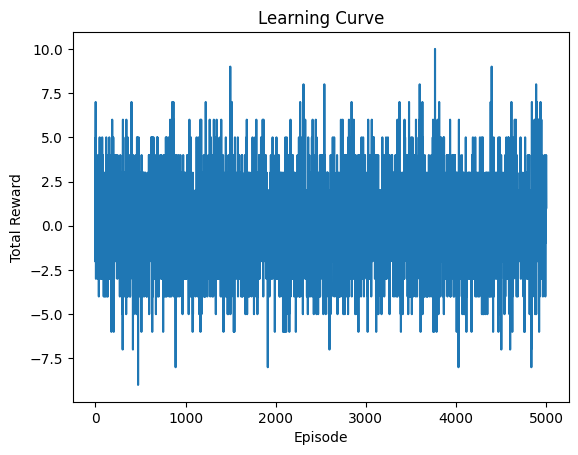

Test Reward: -1
Test Player 0 Reward: -1
Test Player 1 Reward: 0


In [ ]:
import random
import numpy as np
from pettingzoo.classic import rps_v2
import matplotlib.pyplot as plt

epsilon = 0.3
alpha = 0.1
gamma = 0.99
q_table = np.zeros((4, 3))

# Create environment and show the game later
env = rps_v2.env(render_mode="")

# Start game and get initial observation
env.reset()
state, reward, terminated, truncated, info = env.last()


obs = env.step(0)
episode_list = []
reward_list = []

# Set up loop for running Q-learning
for i_episode in range(5000):
    env.reset()
    obs = env.step(0)

    total_reward = 0
    agent_1_reward = 0
    agent_0_reward = 0

    for agent in env.agent_iter():
        # env.render()

        if state not in q_table:
            q_table[state] = [0, 0, 0]

        if random.uniform(0, 1) < epsilon:
            action = random.choice([0, 1, 2])
        else:
            action = np.argmax(q_table[state])

        next_state, reward, terminated, truncated, info = env.last()

        if terminated or truncated:
            break

        if agent == 'player_1':
            agent_1_reward += reward

        if agent == 'player_0':
            agent_0_reward += reward

        env.step(action)

        # next_state = obs
        if next_state not in q_table:
            q_table[next_state] = [0, 0, 0]

        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)

        q_table[state, action] = new_value

        state = next_state

    episode_list.append(i_episode)
    reward_list.append(agent_0_reward)

    print(f'agent_0_reward: {agent_0_reward}, agent_1_reward: {agent_1_reward}')
    print("Episode: {}, Total Reward: {}".format(i_episode, total_reward))

env.close()


plt.plot(episode_list, reward_list)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Learning Curve")
plt.show()


# test the trained agent
# env.reset()

test_episode_num = 1

for i_episode in range(test_episode_num):
    env.reset()
    obs = env.step(0)

    test_reward = 0
    test_player0 = 0
    test_player1 = 0

    for agent in env.agent_iter():
        # env.render()

        state = obs
        action = np.argmax(q_table[state])
        obs, reward, terminated, truncated, info = env.last()
        test_reward += reward

        if agent == 'player_0':
            test_player0 += reward

        if agent == 'player_1':
            test_player1 += reward

        if terminated or truncated:
            break

        env.step(action)

    print("Test Reward: {}".format(test_reward))
    print("Test Player 0 Reward: {}".format(test_player0))
    print("Test Player 1 Reward: {}".format(test_player1))

env.close()


In [ ]:
import random
import numpy as np
from pettingzoo.classic import rps_v2
import matplotlib.pyplot as plt

epsilon = 0.3
alpha = 0.1
gamma = 0.99
q_table = np.zeros((4, 3))

# Create environment and show the game later
env = rps_v2.env(render_mode="")

# Start game and get initial observation
env.reset()
obs = env.step(0)
state = obs[0]

episode_list = []
reward_list = []

# Set up loop for running Q-learning
for i_episode in range(5000):
    total_reward = 0
    agent_0_reward = 0
    agent_1_reward = 0

    done = False
    while not done:
        if state not in q_table:
            q_table[state] = [0, 0, 0]

        if random.uniform(0, 1) < epsilon:
            action = random.choice([0, 1, 2])
        else:
            action = np.argmax(q_table[state])

        obs, reward, done, _ = env.step(action)
        next_state = obs[0]

        if done:
            break

        if env.agent_selection == 'player_1':
            agent_1_reward += reward

        if env.agent_selection == 'player_0':
            agent_0_reward += reward

        if next_state not in q_table:
            q_table[next_state] = [0, 0, 0]

        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        state = next_state

    episode_list.append(i_episode)
    reward_list.append(agent_0_reward)

    print(f'Agent 0 Reward: {agent_0_reward}, Agent 1 Reward: {agent_1_reward}')
    print(f"Episode: {i_episode}, Total Reward: {agent_0_reward + agent_1_reward}")

env.close()

plt.plot(episode_list, reward_list)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Learning Curve")
plt.show()


# Test the trained agent
test_episode_num = 10

for i_episode in range(test_episode_num):
    env.reset()
    obs = env.step(0)
    state = obs[0]

    test_reward = 0
    test_player0 = 0
    test_player1 = 0

    done = False
    while not done:
        action = np.argmax(q_table[state])
        obs, reward, done, _ = env.step(action)
        test_reward += reward
        next_state = obs[0]

        if env.agent_selection == 'player_0':
            test_player0 += reward

        if env.agent_selection == 'player_1':
            test_player1 += reward

        state = next_state

    print(f"Test Reward: {test_reward}")
    print(f"Test Player 0 Reward: {test_player0}")
    print(f"Test Player 1 Reward: {test_player1}")

env.close()


TypeError: ignored

In [ ]:
import random
import numpy as np
from pettingzoo.classic import rps_v2
import matplotlib.pyplot as plt

epsilon = 0.3
alpha = 0.1
gamma = 0.99
q_table = np.zeros((4, 3))

# Create environment and show the game later
env = rps_v2.env(render_mode="")

# Start game and get initial observation
state, reward, done, _ = env.reset()

episode_list = []
reward_list = []

# Set up loop for running Q-learning
for i_episode in range(5000):
    total_reward = 0
    agent_0_reward = 0
    agent_1_reward = 0

    while not done:
        if state not in q_table:
            q_table[state] = [0, 0, 0]

        if random.uniform(0, 1) < epsilon:
            action = random.choice([0, 1, 2])
        else:
            action = np.argmax(q_table[state])

        obs, reward, done, _ = env.step(action)
        next_state = obs

        if done:
            break

        if env.agent_selection == 'player_1':
            agent_1_reward += reward

        if env.agent_selection == 'player_0':
            agent_0_reward += reward

        if next_state not in q_table:
            q_table[next_state] = [0, 0, 0]

        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        state = next_state

    episode_list.append(i_episode)
    reward_list.append(agent_0_reward)

    print(f'Agent 0 Reward: {agent_0_reward}, Agent 1 Reward: {agent_1_reward}')
    print(f"Episode: {i_episode}, Total Reward: {agent_0_reward + agent_1_reward}")

    # Reset environment after each episode
    state, reward, done, _ = env.reset()

env.close()

plt.plot(episode_list, reward_list)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Learning Curve")
plt.show()


# Test the trained agent
test_episode_num = 10

for i_episode in range(test_episode_num):
    state, reward, done, _ = env.reset()

    test_reward = 0
    test_player0 = 0
    test_player1 = 0

    while not done:
        action = np.argmax(q_table[state])
        obs, reward, done, _ = env.step(action)
        test_reward += reward
        next_state = obs

        if env.agent_selection == 'player_0':
            test_player0 += reward

        if env.agent_selection == 'player_1':
            test_player1 += reward

        state = next_state

    print(f"Test Reward: {test_reward}")
    print(f"Test Player 0 Reward: {test_player0}")
    print(f"Test Player 1 Reward: {test_player1}")

env.close()


TypeError: ignored

Streaming output truncated to the last 5000 lines.
Agent 0 Reward: 5, Agent 1 Reward: -5
Episode: 500, Total Reward: 0
Agent 0 Reward: 1, Agent 1 Reward: -1
Episode: 501, Total Reward: 0
Agent 0 Reward: 0, Agent 1 Reward: 0
Episode: 502, Total Reward: 0
Agent 0 Reward: 3, Agent 1 Reward: -3
Episode: 503, Total Reward: 0
Agent 0 Reward: 0, Agent 1 Reward: 0
Episode: 504, Total Reward: 0
Agent 0 Reward: 2, Agent 1 Reward: -2
Episode: 505, Total Reward: 0
Agent 0 Reward: -3, Agent 1 Reward: 3
Episode: 506, Total Reward: 0
Agent 0 Reward: 1, Agent 1 Reward: -1
Episode: 507, Total Reward: 0
Agent 0 Reward: 0, Agent 1 Reward: 0
Episode: 508, Total Reward: 0
Agent 0 Reward: -4, Agent 1 Reward: 4
Episode: 509, Total Reward: 0
Agent 0 Reward: -2, Agent 1 Reward: 2
Episode: 510, Total Reward: 0
Agent 0 Reward: 4, Agent 1 Reward: -4
Episode: 511, Total Reward: 0
Agent 0 Reward: 0, Agent 1 Reward: 0
Episode: 512, Total Reward: 0
Agent 0 Reward: 1, Agent 1 Reward: -1
Episode: 513, Total Reward: 0
A

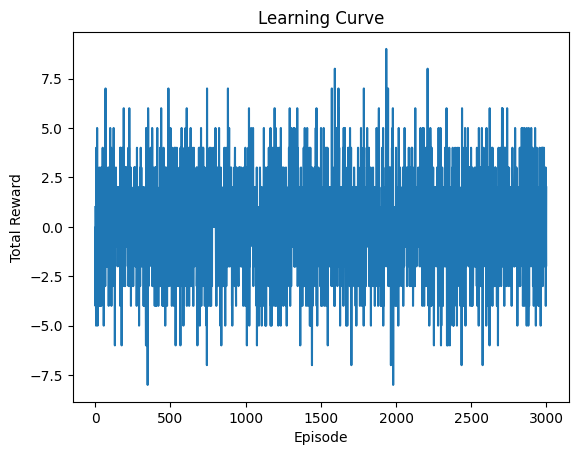

AssertionError: ignored

In [ ]:
import random
import numpy as np
from pettingzoo.classic import rps_v2
import matplotlib.pyplot as plt

epsilon = 0.3
alpha = 0.4
gamma = 0.99
q_table = np.zeros((4, 3))

# Create environment and show the game later
env = rps_v2.env(render_mode="")

# Start game and get initial observation
env.reset()
state, reward, terminated, truncated, info = env.last()

episode_list = []
reward_list = []

# Set up loop for running Q-learning
for i_episode in range(3000):
    env.reset()
    obs = env.step(0)

    total_reward = 0
    agent_1_reward = 0
    agent_0_reward = 0

    for agent in env.agent_iter():
        # env.render()

        if state not in q_table:
            q_table[state] = [0, 0, 0]

        if random.uniform(0, 1) < epsilon:
            action = random.choice([0, 1, 2])
        else:
            action = np.argmax(q_table[state])

        next_state, reward, terminated, truncated, info = env.last()

        if terminated or truncated:
            break

        if agent == 'player_1':
            agent_1_reward += reward

        if agent == 'player_0':
            agent_0_reward += reward

        env.step(action)

        # next_state = obs
        if next_state not in q_table:
            q_table[next_state] = [0, 0, 0]

        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)

        q_table[state, action] = new_value

        state = next_state

    episode_list.append(i_episode)
    reward_list.append(agent_0_reward)

    print(f'Agent 0 Reward: {agent_0_reward}, Agent 1 Reward: {agent_1_reward}')
    print(f"Episode: {i_episode}, Total Reward: {agent_0_reward + agent_1_reward}")

env.close()

plt.plot(episode_list, reward_list)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Learning Curve")
plt.show()


# Test the trained agent
test_episode_num = 10

for i_episode in range(test_episode_num):
    env.reset()
    obs = env.step(0)

    test_reward = 0
    test_player0 = 0
    test_player1 = 0

    for agent in env.agent_iter():
        # env.render()

        state = obs
        action = np.argmax(q_table[state])
        obs, reward, terminated, truncated, info = env.last()
        test_reward += reward

        if agent == 'player_0':
            test_player0 += reward

        if agent == 'player_1':
            test_player1 += reward

        if terminated or truncated:
            break

        env.step(action)

    print("Test Reward: {}".format(test_reward))
    print("Test Player 0 Reward: {}".format(test_player0))
    print("Test Player 1 Reward: {}".format(test_player1))

env.close()
